<a href="https://colab.research.google.com/github/HopeRetina/denoising/blob/main/Smoothing_via_Gaussian_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.signal import detrend

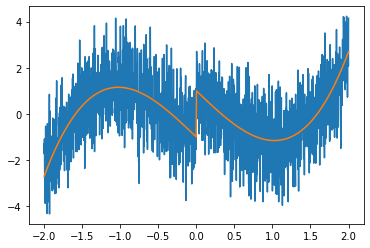

In [ ]:
# Create signal
srate = 512
time = np.arange(-2, 2+1/srate, 1/srate)
pnts = len(time)

signal= detrend( time**3 + np.sign(time) )
noisysignal = signal + np.random.randn(pnts)*1.1

plt.plot(time, noisysignal, time, signal)
plt.show()

Text(0.5, 1.0, 'n=21, s=0.005')

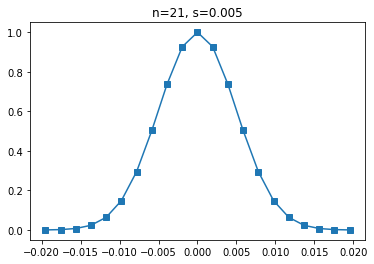

In [ ]:
# Create the Gaussian
k = 10
x = np.arange(-k, k+1)/srate
s = 0.005

gkern = np.exp( -x**2/(2*s**2) )

plt.plot(x, gkern, 's-')
plt.title('n=%s, s=%g'%(2*k+1, s))

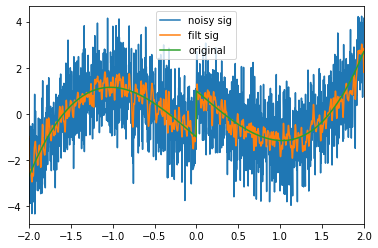

In [ ]:
gkern /= sum(gkern)
filtsig = np.convolve(noisysignal, gkern, mode='same')

plt.plot(time, noisysignal, time, filtsig, time, signal)
plt.legend(['noisy sig', 'filt sig', 'original'])
plt.xlim(time[[0, -1]])

plt.show()

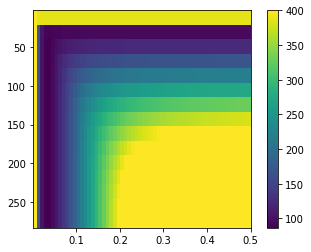

In [ ]:
# define parameter ranges
krange = np.arange(3, 300, 20)
srange = np.linspace(0.001, 0.5, 60)

# initialized some output variables
sseMat = np.zeros( (len(krange), len(srange)) )
allkernels = [ [0]*len(srange) for i in range(len(krange)) ]


# double loop over the two parameters
for ki in range(len(krange)):
  for si in range(len(srange)):
    # create the gaussian
    x = np.arange(-krange[ki], krange[ki]+1)/srate
    gkern = np.exp( -x**2 / (2*srange[si]**2) )
    # filter the signal via convolution
    filtsig = np.convolve(noisysignal, gkern/sum(gkern), mode='same')

    # compute the SSE
    sseMat[ki, si] = np.sum( (filtsig - signal)**2 )

    allkernels[ki][si] = gkern


# plotting

plt.imshow(sseMat, vmax=400,
           extent=[srange[0], srange[-1], krange[-1], krange[0]])
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.colorbar()
plt.show()


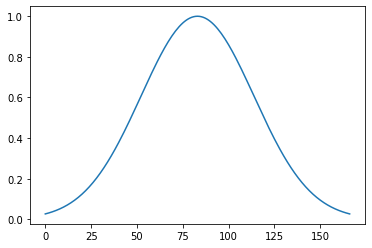

In [ ]:
plt.plot(allkernels[4][7])

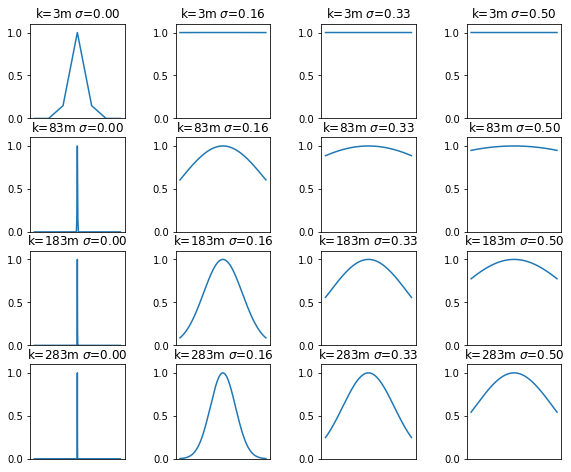

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(10, 8))

# 4 equally spaced points on the grid
sidx = np.linspace(0, len(srange)-1, 4).astype(int)
kidx = np.linspace(0, len(krange)-1, 4).astype(int)

for si in range(4):
  for kj in range(4):
    ax[kj, si].plot(allkernels[kidx[kj]][sidx[si]])
    ax[kj, si].set_xticks([])
    ax[kj, si].set_ylim([0, 1.1])
    ax[kj, si].set_title('k=%gm $\sigma$=%.2f'%(krange[kidx[kj]], srange[sidx[si]]))
    ax[kj, si].set_aspect(1/ax[kj, si].get_data_ratio())

plt.show()